# Training the Baseline Model: Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame from the data
df = pd.read_csv("feature_matrix_train.csv")
df_test = pd.read_csv("feature_matrix_test.csv")

# Separate features and target
X_train = df[['LLB', 'SBI', 'AFC', 'LASD', 'LLSD']]
y_train = df['Superionic']

X_test = df_test[['LLB', 'SBI', 'AFC', 'LASD', 'LLSD']]
y_test = df_test['Superionic']

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the coefficients and intercept of the model
print("\nModel Coefficients:")
for feature, coef in zip(X_train.columns, model.coef_[0]):
    print(f"{feature}: {coef}")
print("Intercept:", model.intercept_[0])


Model Coefficients:
LLB: 0.0
SBI: 0.3924817915988066
AFC: -0.914102846165816
LASD: 0.6672082588503613
LLSD: -0.17889103953183033
Intercept: 0.21970994862999657


# XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# XGBoost Model with Hyperparameter Tuning
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_params = {
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5],
    "subsample": [0.8, 1],
    "n_estimators": [50, 100]
}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring="f1", verbose=2)
xgb_grid.fit(X_train, y_train)

print(f"Best XGBoost Parameters: {xgb_grid.best_params_}")
xgb_best_model = xgb_grid.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Bagging with Random Forest
bagging_model = BaggingClassifier(estimator=model, n_estimators=10)
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=LogisticRegression(random_state=42))

# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

## Neural Network (MLPClassifier) with Hyperparameter Tuning

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (50,), (100,), (10, 10), (20, 20)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500, 1000]
}

# Create the base model
nn_model = MLPClassifier(random_state=42)

# Create GridSearchCV object
nn_grid = GridSearchCV(nn_model, param_grid, cv=5, scoring="f1", n_jobs=-1)
nn_grid.fit(X_train, y_train)

# Get the best model
print(f"Best Neural Network Parameters: {nn_grid.best_params_}")
nn_best_model = nn_grid.best_estimator_

Best Neural Network Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'max_iter': 500}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Model Performance Evaluation

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.65      0.94      0.77        18
           1       0.50      0.10      0.17        10

    accuracy                           0.64        28
   macro avg       0.58      0.52      0.47        28
weighted avg       0.60      0.64      0.56        28



Confusion Matrix:




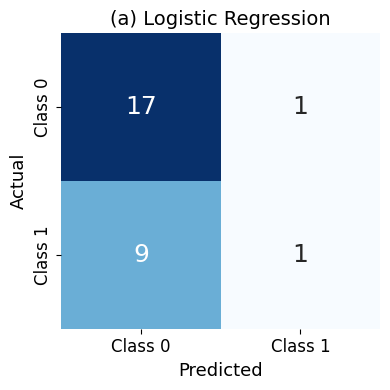

ROC AUC Score: 0.7389




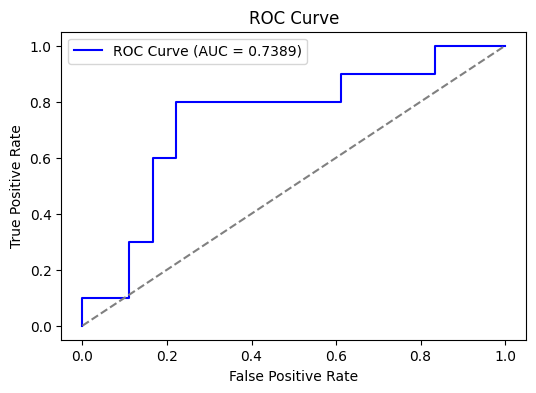



--- XGBoost ---
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        18
           1       0.60      0.60      0.60        10

    accuracy                           0.71        28
   macro avg       0.69      0.69      0.69        28
weighted avg       0.71      0.71      0.71        28



Confusion Matrix:




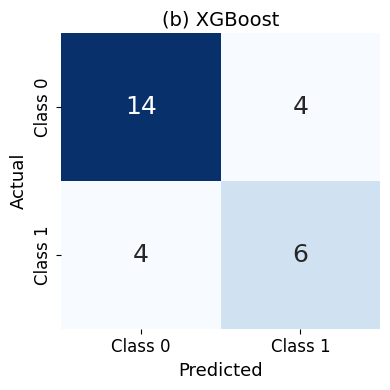

ROC AUC Score: 0.7889




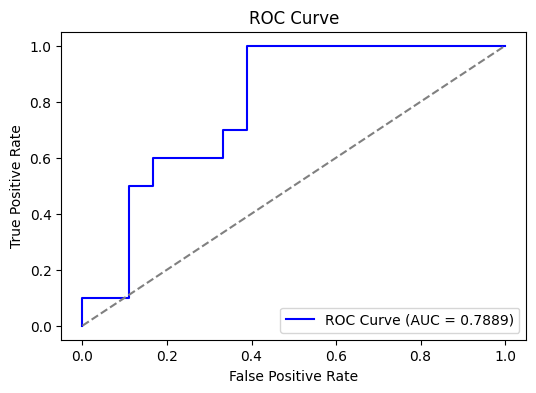



--- Bagging ---
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        18
           1       1.00      0.10      0.18        10

    accuracy                           0.68        28
   macro avg       0.83      0.55      0.49        28
weighted avg       0.79      0.68      0.58        28



Confusion Matrix:




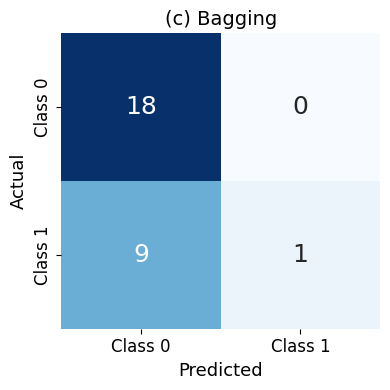

ROC AUC Score: 0.7722




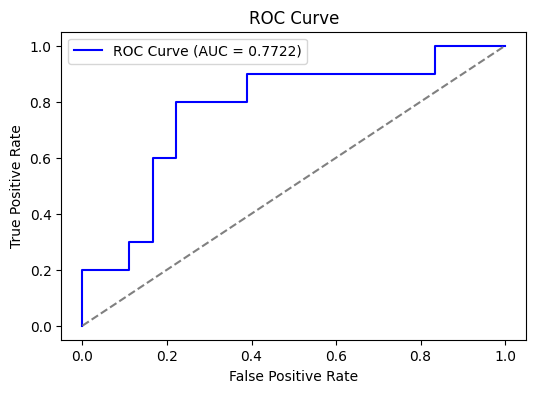



--- Neural Networks ---
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.70      0.70      0.70        10

    accuracy                           0.79        28
   macro avg       0.77      0.77      0.77        28
weighted avg       0.79      0.79      0.79        28



Confusion Matrix:




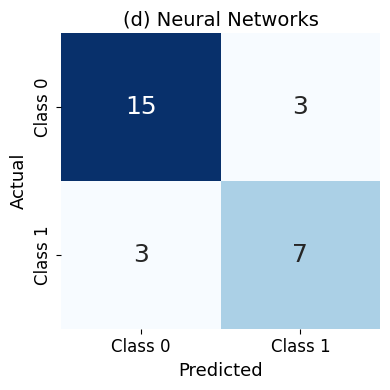

ROC AUC Score: 0.7667




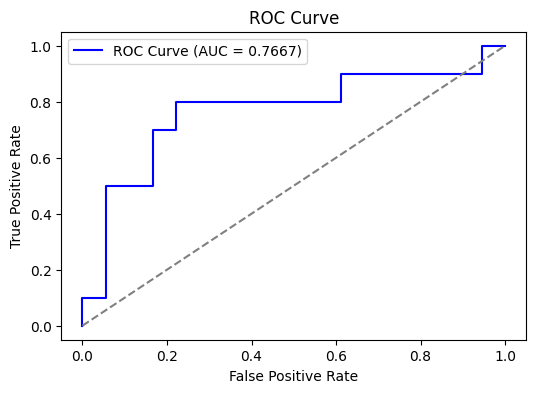

In [ ]:
# Evaluate all models on test set
import string

models = {
    "Logistic Regression": model,  # Make sure 'model' still holds the trained LogisticRegression object
    "XGBoost": xgb_best_model,
    "Bagging": bagging_model,
    "Neural Networks": nn_best_model,
}

i = 0

for name, clf in models.items():
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Print Classification Report
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("\n")

    # Compute Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print("\n")

    # Plot Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"],
            annot_kws={"size": 18}, cbar=False)

    plt.xlabel("Predicted", fontsize=13)
    plt.ylabel("Actual", fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f"({string.ascii_lowercase[i]}) {name}", fontsize=14)
    plt.tight_layout()  # Adjust layout to prevent cutoff
    plt.show()
    print("\n")

    i += 1

    # Compute ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("\n")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random guessing line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    print("\n")

# SHAP Feature Analysis

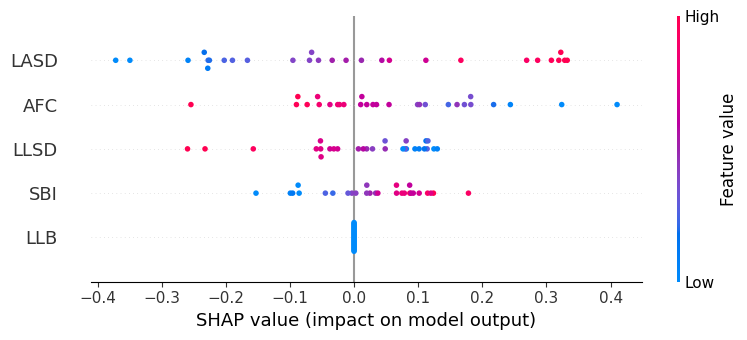

In [ ]:
import shap

# SHAP analysis for Neural Networks
explainer = shap.Explainer(nn_best_model.predict_proba, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values[:, :, 1], X_test)

# Implementing the Best Model on Sample Set with Li compounds

In [ ]:
# Create the DataFrame from the Li sample data
df_sample = pd.read_csv("feature_matrix_sample.csv")
X_sample = df_sample[['LLB', 'SBI', 'AFC', 'LASD', 'LLSD']]

# Make predictions on the sample set using the MLP Classifier
y_pred_sample = nn_best_model.predict(X_sample)

# Convert y_pred to a DataFrame
y_pred_df = pd.DataFrame(y_pred_sample, columns=['Predicted Label'])

# Reset index of X_test to align properly (if needed)
df_sample_reset = df_sample.reset_index(drop=True)

# Append predictions to the test DataFrame
df_sample_final = pd.concat([df_sample_reset, y_pred_df], axis=1)
print(df_sample_final.head())
df_sample_final.to_csv("Li_sample_predictions.csv", index=False)

   LLB     SBI  AFC      LASD      LLSD material_id  formula  num_elements  \
0  0.0  0.4800  2.2  3.023718  2.696676   mp-995393   Li2 S8             2   
1  0.0  3.0900  4.0  1.813697  0.000000     mp-2659   Li1 N3             2   
2  0.0  0.9075  4.0  5.182647  6.229607    mp-27687  Li8 P56             2   
3  0.0  3.3600  4.0  2.508669  4.491665   mp-570935   Li2 I2             2   
4  0.0  3.9600  4.0  2.292948  4.112524   mp-976280  Li2 Br2             2   

   bandgap  energy_above_hull  formation_energy_per_atom  Predicted Label  
0   2.1989                0.0                  -0.611415                1  
1   3.6364                0.0                  -0.205822                0  
2   1.6882                0.0                  -0.190701                0  
3   4.3818                0.0                  -1.422324                0  
4   4.9348                0.0                  -1.835895                0  
